First, imports.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import cakeopt

Define a target function that takes named parameters. To make things interesting we can include some categorical values.

In [2]:
categorical_encoding = dict(A=-2, B=0, C=4)
categories = tuple(sorted(categorical_encoding.keys()))
print(categories)

def target_function(**param_dict):
    param_list = []
    for (p_name, p_val) in sorted(param_dict.items()):
        try:
            param_list.append(float(p_val))
        except ValueError as err:
            param_list.append(categorical_encoding[p_val])
    param_arr = np.array(param_list)
    result = np.sum(param_arr ** 2)
    return result

('A', 'B', 'C')


Describe the parameter space.

In [3]:
param_descriptor = {
    'x1': ('continuous', (-5, 5)),
    'x2': ('continuous', (-5, 5)),
    'x3': ('integer', (-5, 5)),
    'x4': ('integer', (-5, 5)),
    'x5': ('categorical', categories),
    'x6': ('categorical', categories),
}

Call the optimiser. We let it know that we have no noise in our measurements, as the test function is deterministic. Depending on your system and the number of iterations, this can take a few minutes.

In [4]:
%%time
MAX_ITER = 30
opt_res = cakeopt.cakeopt_search(target_function, param_descriptor,
    max_iter=MAX_ITER, noise=False, random_state=0)

CPU times: user 6min 7s, sys: 14.3 s, total: 6min 21s
Wall time: 1min 35s


Finally, plot the results. The optimiser returns the parameter values one-hot encoded, so we have to reconstruct x5 and x6.

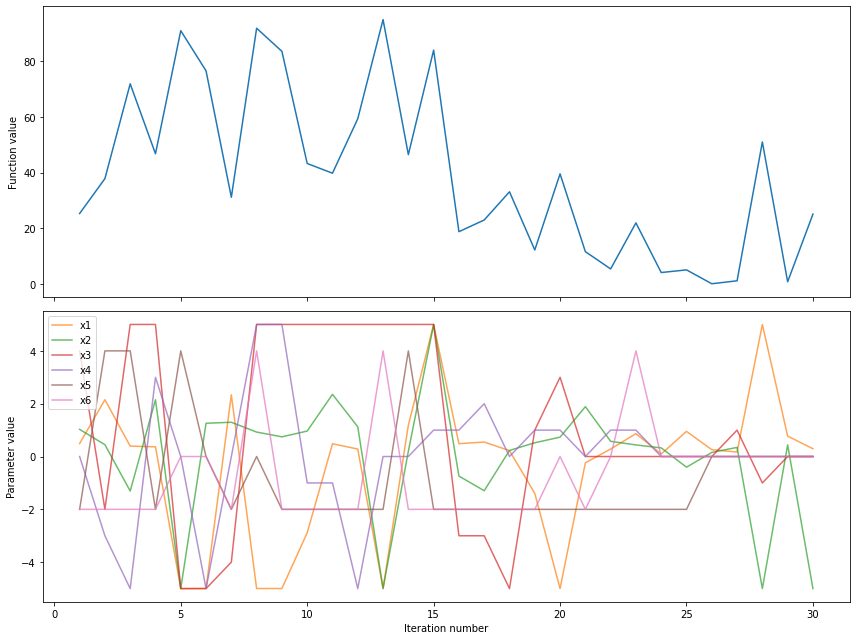

In [5]:
iter_no = np.arange(MAX_ITER) + 1
func_values = opt_res.f
param_values = opt_res.x
x5_values = param_values[:, 4] * (-2) + param_values[:, 5] * 0 + param_values[:, 6] * 4
x6_values = param_values[:, 7] * (-2) + param_values[:, 8] * 0 + param_values[:, 9] * 4

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(12, 9))
ax[0].plot(iter_no, func_values)
ax[0].set_ylabel('Function value')

ax[1].plot(iter_no, iter_no * np.nan) # In order to skip a colour
ax[1].plot(iter_no, param_values[:, 0], alpha=.7, label='x1')
ax[1].plot(iter_no, param_values[:, 1], alpha=.7, label='x2')
ax[1].plot(iter_no, param_values[:, 2], alpha=.7, label='x3')
ax[1].plot(iter_no, param_values[:, 3], alpha=.7, label='x4')
ax[1].plot(iter_no, x5_values, alpha=.7, label='x5')
ax[1].plot(iter_no, x6_values, alpha=.7, label='x6')
ax[1].legend(loc=2)
ax[1].set_xlabel('Iteration number')
ax[1].set_ylabel('Parameter value')

plt.tight_layout()